In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045


In [3]:
del df["Lat"]
del df["Long"]

In [4]:
countries_df = df[["Province/State","Country/Region"]]
countries_df.head()

,Province/State,Country/Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola


In [5]:
days_df = df.copy()
del days_df["Province/State"]
del days_df["Country/Region"]

In [6]:
days_df = days_df.stack().reset_index()
days_df.columns=["country_id", "date", "count"]
days_df.head()

,country_id,date,count
0,0,1/22/20,0
1,0,1/23/20,0
2,0,1/24/20,0
3,0,1/25/20,0
4,0,1/26/20,0


In [7]:
df = pd.merge(countries_df, days_df, left_index=True, right_on="country_id")
del df["country_id"]
df["date"] = pd.to_datetime(df["date"])
df.head()

,Province/State,Country/Region,date,count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Afghanistan,2020-01-23,0
2,NaN,Afghanistan,2020-01-24,0
3,NaN,Afghanistan,2020-01-25,0
4,NaN,Afghanistan,2020-01-26,0


In [8]:
global_df = df.groupby(["date"],as_index=False).sum("count")

In [9]:
global_df.tail()

,date,count
478,2021-05-14,161894208
479,2021-05-15,162521726
480,2021-05-16,163069932
481,2021-05-17,163609626
482,2021-05-18,164231810


In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [11]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

<IPython.core.display.Javascript object>


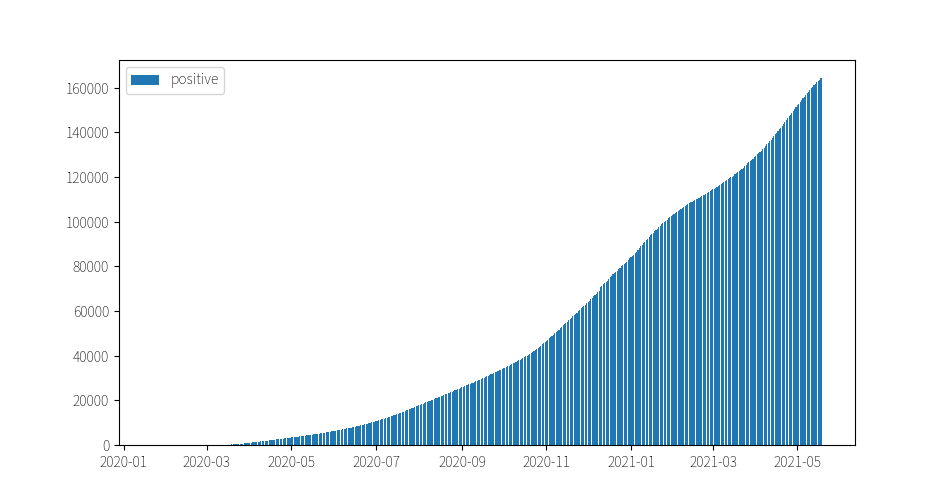

In [12]:
plt.figure(figsize=(9.5,5))
plt.bar(global_df["date"],global_df["count"]/1000,label="positive")
plt.legend()

In [13]:
trans = pd.DataFrame()
trans["date"] = global_df.iloc[1:]["date"]
trans["count1"] = global_df["count"].iloc[1:]
trans = trans.reset_index().drop(columns="index")
trans["count"] = trans["count1"] - global_df["count"].iloc[0:]
del trans["count1"]
trans["move_ave7"] = trans["count"].rolling(7).mean()


In [14]:
trans.tail()

,date,count,move_ave7
477,2021-05-14,718060.0,713131.571429
478,2021-05-15,627518.0,690413.285714
479,2021-05-16,548206.0,677080.000000
480,2021-05-17,539694.0,665332.142857
481,2021-05-18,622184.0,648719.428571


<IPython.core.display.Javascript object>


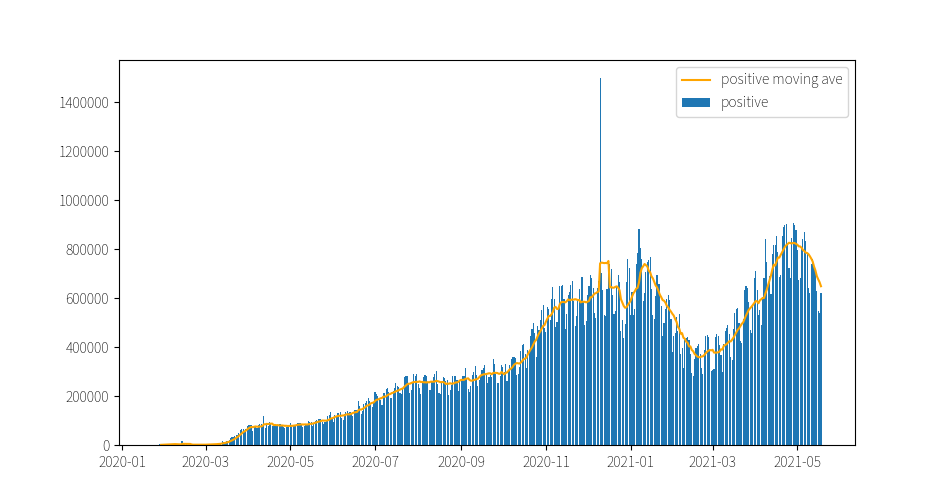

In [15]:
plt.figure(figsize=(9.5,5))
plt.bar(trans["date"],trans["count"],label="positive")
plt.plot_date(trans["date"],trans["move_ave7"],label="positive moving ave", fmt="-", color="orange")
plt.legend()

## 国別

In [16]:
df.tail()

,Province/State,Country/Region,date,count
132820,NaN,Zimbabwe,2021-05-14,38535
132821,NaN,Zimbabwe,2021-05-15,38554
132822,NaN,Zimbabwe,2021-05-16,38560
132823,NaN,Zimbabwe,2021-05-17,38572
132824,NaN,Zimbabwe,2021-05-18,38595


In [17]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [18]:
countries = pd.DataFrame({"country":[
    "Japan",
    "US",
    "India",
    "Sweden",
    "Brazil",
    "Israel",
    "Korea, South",
    "Taiwan*",
]})
dates = df["date"].unique()

In [19]:
c_df = pd.merge(countries, df, left_on="country", right_on="Country/Region", how="inner")[["country","date","count"]]

In [20]:
c_df

,country,date,count
0,Japan,2020-01-22,2
1,Japan,2020-01-23,2
2,Japan,2020-01-24,2
3,Japan,2020-01-25,2
4,Japan,2020-01-26,4
...,...,...,...
3859,Taiwan*,2021-05-14,1290
3860,Taiwan*,2021-05-15,1475
3861,Taiwan*,2021-05-16,1682
3862,Taiwan*,2021-05-17,2017


In [21]:
c_df.groupby("country").count()

,date,count
country,,
Brazil,483,483
India,483,483
Israel,483,483
Japan,483,483
"Korea, South",483,483
Sweden,483,483
Taiwan*,483,483
US,483,483


In [22]:
len(dates)

483

In [23]:
c_trans = c_df.copy()
c_trans["inc_count"] = 0
for c in countries["country"]:
    yday_t = c_trans.loc[c_trans["country"]==c].reset_index()
    t = yday_t.iloc[1:].reset_index()
    t["inc_count"] = t["count"] - t.join(yday_t,rsuffix="_y")["count_y"]
    c_trans.loc[(c_trans["country"]==c) & (c_trans["date"]>=t["date"].min()),"inc_count"] = t["inc_count"].values.tolist()
    c_trans.loc[(c_trans["country"]==c),"move_ave7"] = c_trans.loc[c_trans["country"]==c]["inc_count"].rolling(7).mean()
pd.concat([c_trans.head(2),c_trans.tail(2)])


,country,date,count,inc_count,move_ave7
0,Japan,2020-01-22,2,0,NaN
1,Japan,2020-01-23,2,0,NaN
3862,Taiwan*,2021-05-17,2017,335,116.857143
3863,Taiwan*,2021-05-18,2260,243,150.000000


In [24]:
c_trans[c_trans["country"]=="Japan"].tail()

,country,date,count,inc_count,move_ave7
478,Japan,2021-05-14,673539,6288,6460.000000
479,Japan,2021-05-15,679870,6331,6328.857143
480,Japan,2021-05-16,685135,5265,6141.285714
481,Japan,2021-05-17,688873,3738,5981.428571
482,Japan,2021-05-18,694077,5204,5816.285714


In [25]:
print(any(c_trans["date"].isnull()))
print(any(c_trans["date"].isna()))

False
False


In [26]:
c_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3864 entries, 0 to 3863
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   country    3864 non-null   object        
 1   date       3864 non-null   datetime64[ns]
 2   count      3864 non-null   int64         
 3   inc_count  3864 non-null   int64         
 4   move_ave7  3816 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 181.1+ KB


<IPython.core.display.Javascript object>


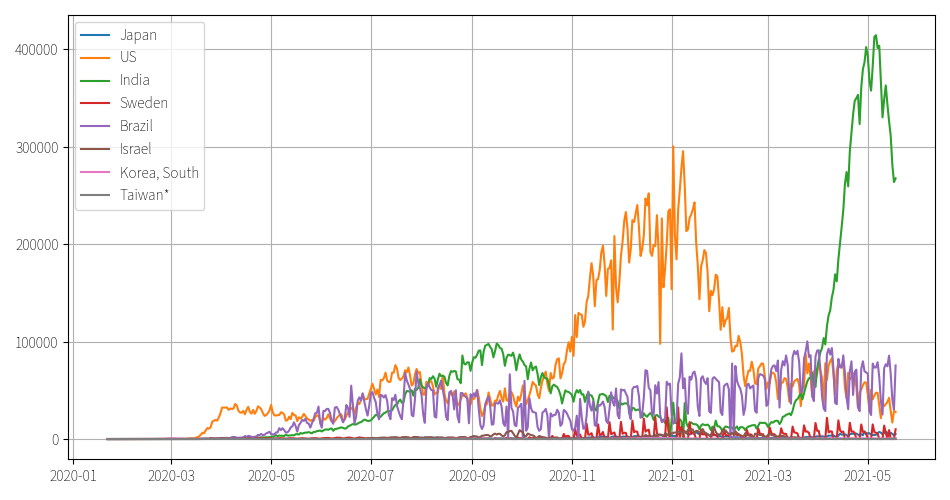

Japan
US
India
Sweden
Brazil
Israel
Korea, South
Taiwan*


In [27]:
plt.figure(figsize=(9.5,5))
plt.grid()
dates = c_trans["date"].unique()
for c in countries["country"]:
    print(c)
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["inc_count"],label=c, fmt="-")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


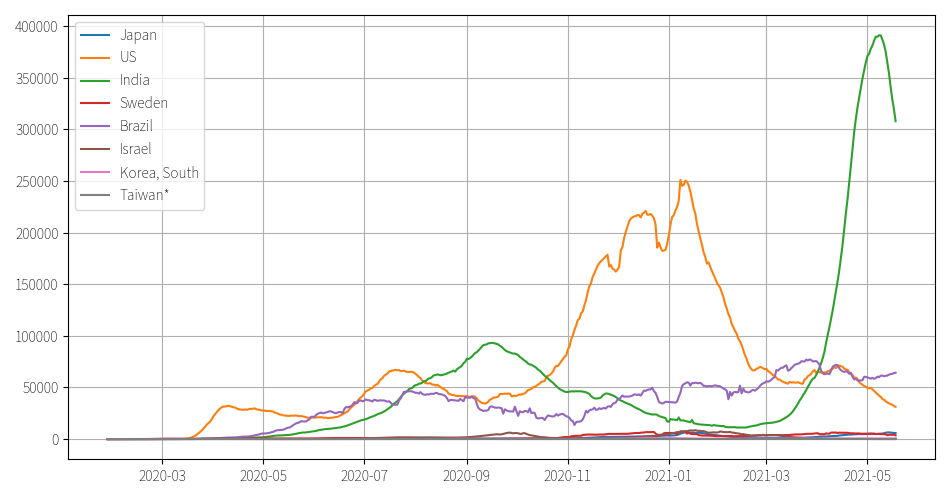

Japan
US
India
Sweden
Brazil
Israel
Korea, South
Taiwan*


In [28]:
plt.figure(figsize=(9.5,5))
plt.grid()
dates = c_trans["date"].unique()
for c in countries["country"]:
    print(c)
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["move_ave7"],label=c, fmt="-")
plt.legend()
plt.tight_layout()

## 人口当たり

In [29]:
pop = pd.read_excel("world-data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop_latest = pop.loc[pop["Type"]=="Country/Area"][[pop.columns[2],pop.columns[-1]]]
pop_latest.columns = ["un_country","population"]
pop_latest.head(1)

,un_country,population
26,Burundi,11890.781


In [30]:
alternates = pd.DataFrame([
    ("US","United States of America"),
    ("Russia","Russian Federation"),
    ("Iran","Iran (Islamic Republic of)"),
    ("Bolivia","Bolivia (Plurinational State of)"),
    ("Moldova","Republic of Moldova"),
    ("Venezuela","Venezuela (Bolivarian Republic of)"),
    ("Korea, South","Republic of Korea"),
    ("Congo (Kinshasa)","Democratic Republic of the Congo"),
    ("Congo (Brazzaville)","Congo"),
    ("Vietnam","Viet Nam"),
    ("Laos","Lao People's Democratic Republic"),
    ("Taiwan*","China, Taiwan Province of China"),
    ("Tanzania","United Republic of Tanzania"),
    ("Brunei","Brunei Darussalam"),
    ("Micronesia","Micronesia (Fed. States of)"),
    ("Syria","Syrian Arab Republic"),
], columns = ["covid_country","un_country"])

In [31]:
alternates.head()

,covid_country,un_country
0,US,United States of America
1,Russia,Russian Federation
2,Iran,Iran (Islamic Republic of)
3,Bolivia,Bolivia (Plurinational State of)
4,Moldova,Republic of Moldova


In [32]:
c_trans_pop = pd.merge(c_trans, alternates, left_on="country", right_on="covid_country", how="left")
#c_trans_pop["country"].replace(renames,inplace=True)
del c_trans_pop["covid_country"]

In [33]:
c_trans_pop.head()

,country,date,count,inc_count,move_ave7,un_country
0,Japan,2020-01-22,2,0,NaN,NaN
1,Japan,2020-01-23,2,0,NaN,NaN
2,Japan,2020-01-24,2,0,NaN,NaN
3,Japan,2020-01-25,2,0,NaN,NaN
4,Japan,2020-01-26,4,2,NaN,NaN


In [34]:
c_trans_pop.isnull().any(axis=0)

country       False
date          False
count         False
inc_count     False
move_ave7      True
un_country     True
dtype: bool

In [35]:
c_trans_pop["un_country"].fillna(c_trans_pop["country"],inplace=True)

In [36]:
c_trans_pop.isnull().any(axis=0)

country       False
date          False
count         False
inc_count     False
move_ave7      True
un_country    False
dtype: bool

In [37]:
c_trans_pop = pd.merge(c_trans_pop, pop_latest, on="un_country", how="left")

In [38]:
c_trans_pop.head()

,country,date,count,inc_count,move_ave7,un_country,population
0,Japan,2020-01-22,2,0,NaN,Japan,126476.458
1,Japan,2020-01-23,2,0,NaN,Japan,126476.458
2,Japan,2020-01-24,2,0,NaN,Japan,126476.458
3,Japan,2020-01-25,2,0,NaN,Japan,126476.458
4,Japan,2020-01-26,4,2,NaN,Japan,126476.458


In [39]:
c_trans_pop["count_per_mil_pop"] = c_trans_pop["count"] / (c_trans_pop["population"] / 1000)
c_trans_pop["inc_count_per_mil_pop"] = c_trans_pop["inc_count"] / (c_trans_pop["population"] / 1000)

In [40]:
c_trans_pop.head()

,country,date,count,inc_count,move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop
0,Japan,2020-01-22,2,0,NaN,Japan,126476.458,0.015813,0.0
1,Japan,2020-01-23,2,0,NaN,Japan,126476.458,0.015813,0.0
2,Japan,2020-01-24,2,0,NaN,Japan,126476.458,0.015813,0.0
3,Japan,2020-01-25,2,0,NaN,Japan,126476.458,0.015813,0.0
4,Japan,2020-01-26,4,2,NaN,Japan,126476.458,0.031626,0.015813


In [41]:
#c_trans_pop["move_ave7_milpop"] = 0
for c in countries["country"]:
    c_trans_pop.loc[(c_trans_pop["country"]==c),"move_ave7_milpop"] = c_trans_pop.loc[c_trans_pop["country"]==c]["count_per_mil_pop"].rolling(7).mean()
    c_trans_pop.loc[(c_trans_pop["country"]==c),"inc_move_ave7_milpop"] = c_trans_pop.loc[c_trans_pop["country"]==c]["inc_count_per_mil_pop"].rolling(7).mean()

In [42]:
c_trans_pop.loc[c_trans_pop["country"]=="Japan"].tail()


,country,date,count,inc_count,move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,move_ave7_milpop,inc_move_ave7_milpop
478,Japan,2021-05-14,673539,6288,6460.000000,Japan,126476.458,5325.410046,49.716762,5172.903968,51.076699
479,Japan,2021-05-15,679870,6331,6328.857143,Japan,126476.458,5375.466792,50.056747,5222.943772,50.039804
480,Japan,2021-05-16,685135,5265,6141.285714,Japan,126476.458,5417.095093,41.628301,5271.500521,48.556750
481,Japan,2021-05-17,688873,3738,5981.428571,Japan,126476.458,5446.65,29.554907,5318.793343,47.292822
482,Japan,2021-05-18,694077,5204,5816.285714,Japan,126476.458,5487.795998,41.145997,5364.780445,45.987102


<IPython.core.display.Javascript object>


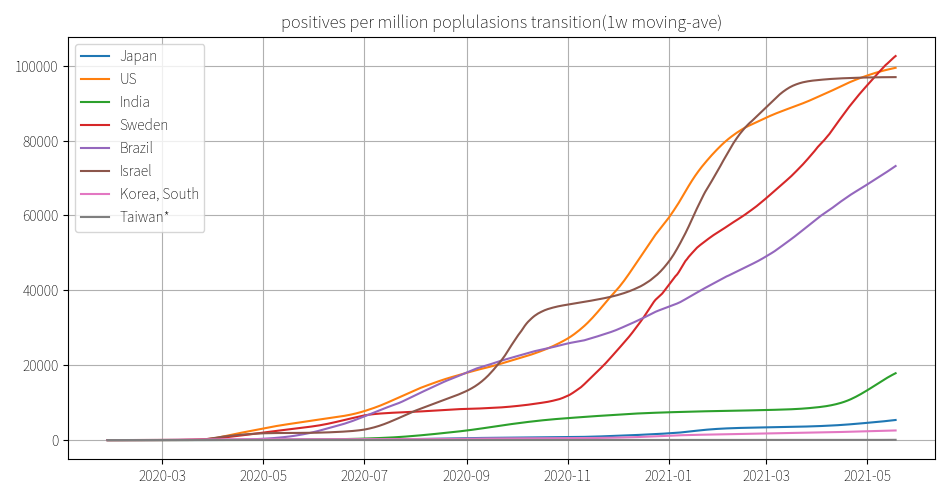

In [43]:
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)")
dates = c_trans_pop["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans_pop.loc[c_trans_pop["country"]==c]["move_ave7_milpop"],label=c, fmt="-")

#for c in countries["country"]:
#    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["move_ave7"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


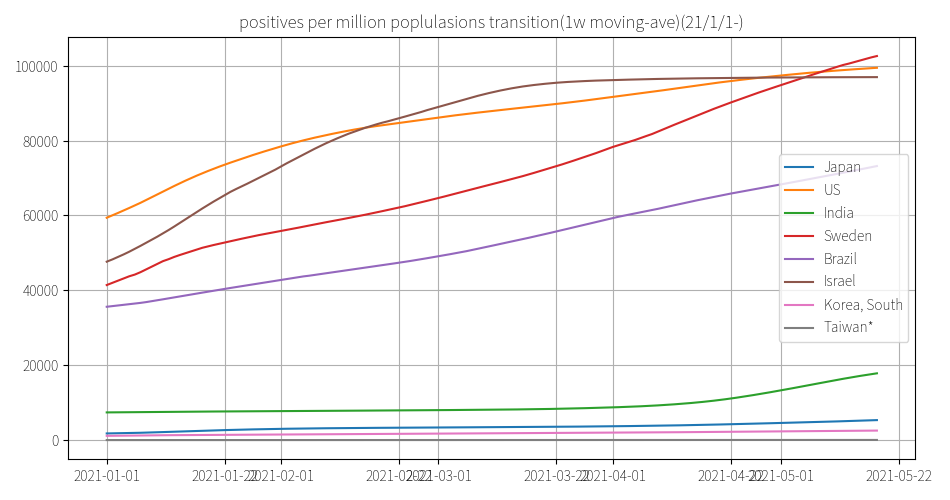

In [44]:
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)(21/1/1-)")
dates = c_trans_pop.loc[c_trans_pop["date"]>="2021-01-01"]["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans_pop.loc[(c_trans_pop["country"]==c) & (c_trans_pop["date"]>="2021-01-01")]["move_ave7_milpop"],label=c, fmt="-")

#for c in countries["country"]:
#    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["move_ave7"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()

## 人口当たりの新規感染者数

<IPython.core.display.Javascript object>


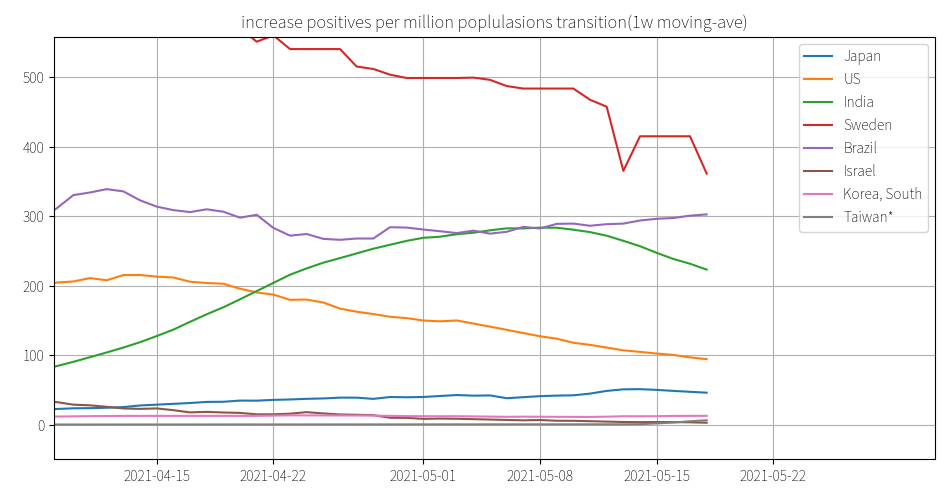

In [45]:
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("increase positives per million poplulasions transition(1w moving-ave)")
dates = c_trans_pop["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans_pop.loc[c_trans_pop["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")

plt.legend()
plt.tight_layout()